# Amazon Reviews Data Set EDA & Model Building 

## Importing necessary libraries

In [1]:
#Import the necessary libraries (numpy, pandas, seaborn, matplotlib, 
#scikit-learn packages metrics,clustering,scale, train_test_split, 
#LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier and GaussianNB)

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from sklearn import cluster
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

## Importing CSV File

In [2]:
#Importing the csv file and reading from it 
amazon_review_data = pd.read_csv("amz_reviews.csv")

## Quick Insight into Data 

In [3]:
#Printing the number of rows and columns in the dataset 
print("Number of rows are '{0}' and Number of columns are '{1}'.".format(amazon_review_data.shape[0],amazon_review_data.shape[1]))

Number of rows are '44948' and Number of columns are '10'.


In [4]:
#Printing the datatypes for each columns
print("\nDatatype for each attribute:\n{}".format(amazon_review_data.dtypes))


Datatype for each attribute:
reviewText       object
polarity        float64
subjectivity    float64
num_words         int64
flesch_score    float64
verbs_ratio     float64
nouns_ratio     float64
prp_ratio       float64
grammar           int64
low_quality       int64
dtype: object


In [5]:
#Outputting the first 5 rows from the dataset
amazon_review_data.head(10)

,reviewText,polarity,subjectivity,num_words,flesch_score,verbs_ratio,nouns_ratio,prp_ratio,grammar,low_quality
0,Excellent,1.00,1.00,1,-47.99,0.00,1.00,0.00,0,1
1,Great,0.80,0.75,1,121.22,0.00,1.00,0.00,0,1
2,exactly what i wanted,0.25,0.25,4,50.50,0.25,0.25,0.00,2,1
3,very good,0.91,0.78,2,120.21,0.00,0.00,0.00,1,1
4,thank you very much,0.26,0.26,4,118.18,0.00,0.25,0.25,1,1
5,Nothing to complain about.,0.00,0.00,4,75.88,0.25,0.00,0.00,0,1
6,Cute case,0.50,1.00,2,120.21,0.00,1.00,0.00,0,1
7,Works great. Even works with case on the watch.,0.80,0.75,9,113.10,0.22,0.22,0.00,0,1
8,My office has NO cell service unless I sit nex...,0.09,0.45,111,82.78,0.12,0.23,0.09,1,1
9,Great product!\n\n(Review in exchage for free/...,1.00,0.75,8,37.98,0.00,0.50,0.00,1,1


## Data Pre-Processing 

In [6]:
#Droping the column, 'reviewText' as it is of type object and provides no values numerically 
#as num_words column shows the number of word in each review text 
amazon_review_data.drop(['reviewText'], axis=1, inplace=True)

#Outputting the first 5 rows from the dataset to show that 'reviewText' 
#has been removed from the dataset
amazon_review_data.head(5)

,polarity,subjectivity,num_words,flesch_score,verbs_ratio,nouns_ratio,prp_ratio,grammar,low_quality
0,1.00,1.00,1,-47.99,0.00,1.00,0.00,0,1
1,0.80,0.75,1,121.22,0.00,1.00,0.00,0,1
2,0.25,0.25,4,50.50,0.25,0.25,0.00,2,1
3,0.91,0.78,2,120.21,0.00,0.00,0.00,1,1
4,0.26,0.26,4,118.18,0.00,0.25,0.25,1,1


In [7]:
#Replacing column name 'low_quality' with just 'quality'
#to prevent confusion as value 0 represents high quality and 
#1 represents low quality as binary values 
amazon_review_data.rename({'low_quality': 'quality'}, axis=1, inplace=True)

#Outputting the first 5 rows from the dataset to show that column name change
amazon_review_data.head(5)

,polarity,subjectivity,num_words,flesch_score,verbs_ratio,nouns_ratio,prp_ratio,grammar,quality
0,1.00,1.00,1,-47.99,0.00,1.00,0.00,0,1
1,0.80,0.75,1,121.22,0.00,1.00,0.00,0,1
2,0.25,0.25,4,50.50,0.25,0.25,0.00,2,1
3,0.91,0.78,2,120.21,0.00,0.00,0.00,1,1
4,0.26,0.26,4,118.18,0.00,0.25,0.25,1,1


In [8]:
#Check for any duplicated row in the dataset
duplicate_rows = amazon_review_data[amazon_review_data.duplicated()]

#Print the number of dupluicated rows 
print("Number of duplicated rows for each attribute are '{0}' which makes up {1:.0f}% of the entire data.".format(duplicate_rows.shape[0],duplicate_rows.shape[0]* 100 / len(amazon_review_data)))

Number of duplicated rows for each attribute are '16398' which makes up 36% of the entire data.


In [9]:
#Remove all the duplicated rows and update the dataset
amazon_review_data.drop_duplicates(keep=False, inplace=True)

In [10]:
#Checks for any duplicated row after removing them 
duplicate_rows = amazon_review_data[amazon_review_data.duplicated()]

#Prints the number of duplicated values
print("Number of duplicated rows for each attribute after removing them: {}".format(duplicate_rows.shape[0]))

#Prints the number of rows and columns 
print("Number of after removing duplicated values rows are '{0}' and Number of columns are '{1}'.".format(amazon_review_data.shape[0],amazon_review_data.shape[1]))

Number of duplicated rows for each attribute after removing them: 0
Number of after removing duplicated values rows are '27169' and Number of columns are '9'.


In [11]:
#Print number of values for each attributes 
print("Number of values for each attribute:\n{}\n"
     .format(amazon_review_data.count()))

Number of values for each attribute:
polarity        27169
subjectivity    27169
num_words       27169
flesch_score    27169
verbs_ratio     27169
nouns_ratio     27169
prp_ratio       27169
grammar         27169
quality         27169
dtype: int64



In [12]:
#Checking for number of missing values for each column 
print("Checking for number missing values for each attribute:\n{}"
      .format(amazon_review_data.isnull().sum() ))

Checking for number missing values for each attribute:
polarity        0
subjectivity    0
num_words       0
flesch_score    0
verbs_ratio     0
nouns_ratio     0
prp_ratio       0
grammar         0
quality         0
dtype: int64


## Data Exploration - Exploratory Data Analysis 

### Heatmap

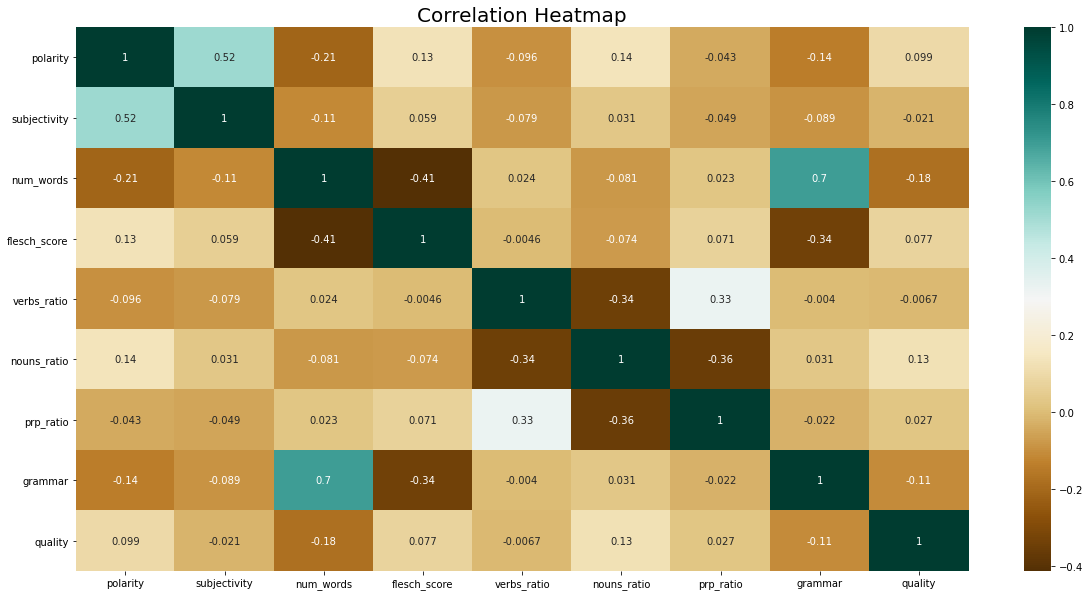

In [13]:
#Using a simple heatmaps visulisation techniques to show correlations between attributes
plt.figure(figsize=(20,10))
corr = amazon_review_data.corr()
heatmap = sns.heatmap(corr,cmap="BrBG",annot=True)
heatmap.set_title("Correlation Heatmap",fontdict={'fontsize':20})
plt.show()

### BoxPlot

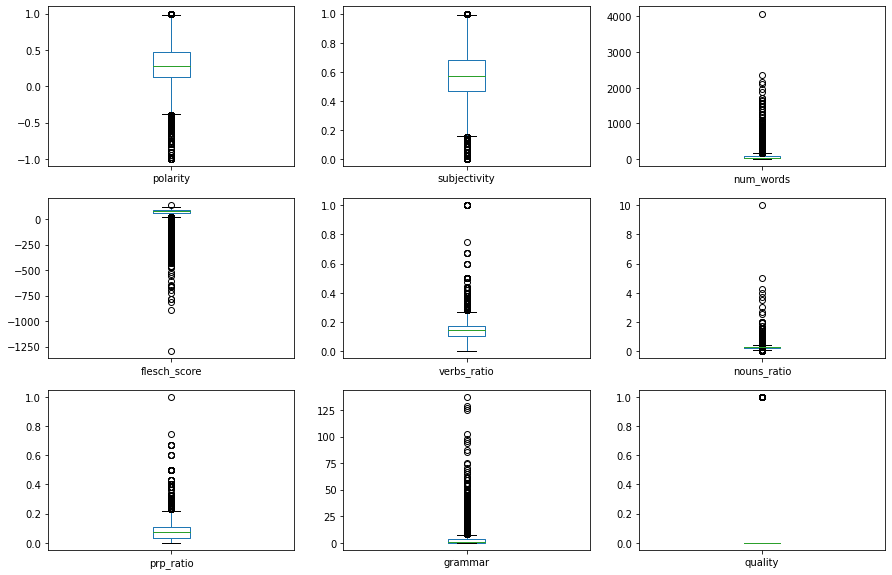

In [14]:
#Using box plot visualisation technique to show distributions of features
box_polt = amazon_review_data.plot(kind='box', subplots=True, layout=(3,3), figsize=(15, 10))
plt.show();

### Histogram

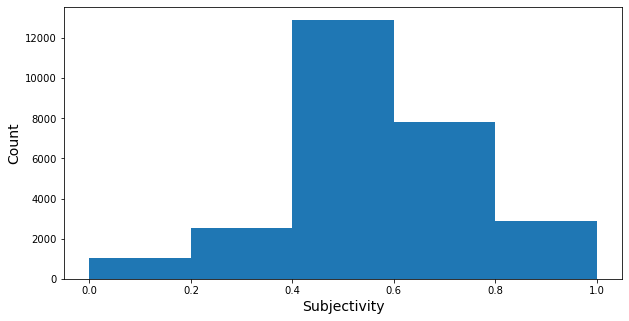

In [15]:
#A Simple Histogram to show the distribtion of data in subjectivity
plt.figure(figsize=(10,5))
num_bins = 5
hist = plt.hist(amazon_review_data['subjectivity'], num_bins, alpha=1)
plt.xlabel("Subjectivity",fontdict={'fontsize':14})
plt.ylabel("Count",fontdict={'fontsize':14})
plt.show;

### Scatter  Plot

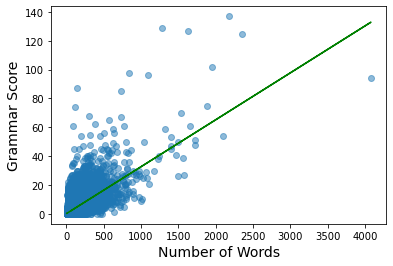

In [16]:
#A simple scatter plot
fig, ax = plt.subplots()
fit = np.polyfit(amazon_review_data['num_words'], amazon_review_data['grammar'], deg=1)
ax.plot(amazon_review_data['num_words'], fit[0] * amazon_review_data['num_words'] + fit[1], color='green')
ax.scatter(amazon_review_data['num_words'],amazon_review_data['grammar'], alpha=0.5)
plt.xlabel("Number of Words",fontdict={'fontsize':14})
plt.ylabel("Grammar Score",fontdict={'fontsize':14})
plt.show();

### Bar Chart

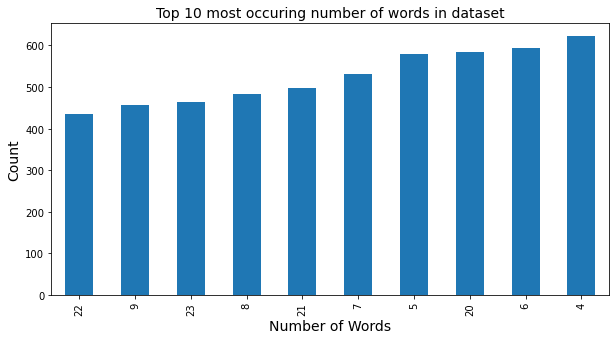

In [17]:
#A Simple Bar Chart to show the top 10 number of words 
plt.figure(figsize=(10,5))
bar_chart=amazon_review_data['num_words'].value_counts().nlargest(10).sort_values(ascending=True).plot.bar()
plt.title('Top 10 most occuring number of words in dataset', fontdict={'fontsize':14})
plt.ylabel("Count", fontdict={'fontsize':14})
plt.xlabel("Number of Words",fontdict={'fontsize':14})
plt.show()

### Pie Chart

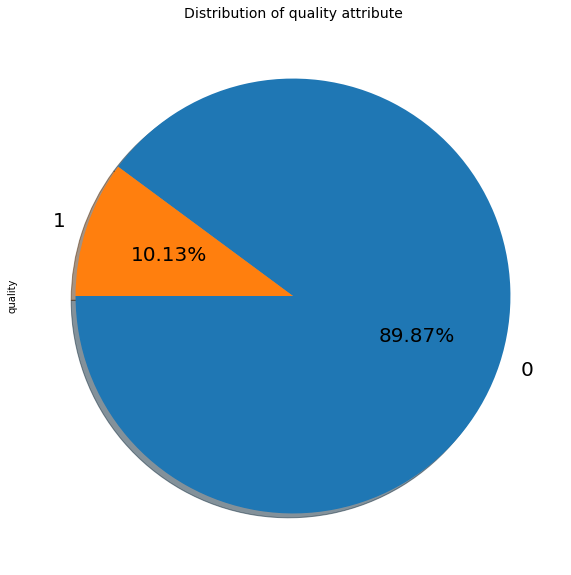

In [18]:
#A simple pie chart to show the distribution of featrues in quality attribute 
plt.figure(figsize=(15,10))
amazon_review_data['quality'].value_counts().plot.pie(shadow=True, startangle=180, autopct='%.2f%%', 
                                                      textprops={'fontsize': 20})
plt.title('Distribution of quality attribute', fontdict={'fontsize':14})
plt.show()

# Unspervised Model - K-mean Clustering

In [19]:
#Segment the outcome (last column), variable Y which is the predicting value 
#and remaining data (attributes), variable X which are the inputs used to predict Y
X = amazon_review_data.drop(['quality'], axis=1)
Y = amazon_review_data.quality

In [20]:
scaled_data = scale(X)
scaled_data

array([[ 1.80315223,  0.94187103, -0.56318053, ..., -0.24158477,
        -1.19450347, -0.50239889],
       [-1.31237097,  0.68356461, -0.58230748, ...,  1.07482451,
        -1.19450347, -0.50239889],
       [ 1.61988616,  1.97509672, -0.62056138, ...,  0.44796295,
        -1.19450347, -0.50239889],
       ...,
       [-0.28608097, -0.19467723,  0.82352323, ..., -0.30427093,
         0.4871341 ,  0.32262909],
       [ 0.19041081, -0.14301594,  0.47923816, ..., -0.0535263 ,
         0.02850567, -0.2961419 ],
       [ 0.92347509,  0.68356461, -0.06587987, ...,  0.25990448,
        -0.43012276, -0.0898849 ]])

## Evaluating K-Means: Elbow Method

In [21]:
#Calculate sum of squared error(SSE) for each number of cluster
sse={}
for k in range(1,10):
    kmeans1 = cluster.KMeans(n_clusters=k)
    kmeans1.fit(scaled_data)
    #sum of distances of samples to thier closet cluster center
    sse[k] = kmeans1.inertia_ 

<Figure size 432x288 with 0 Axes>

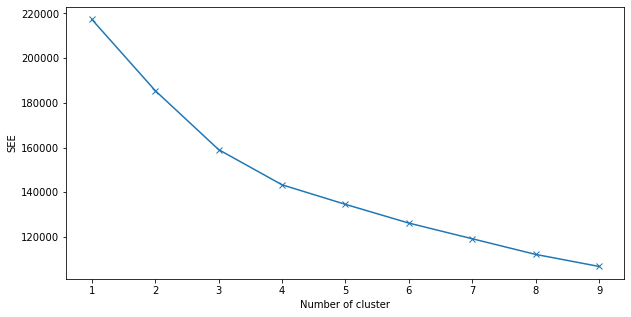

In [22]:
#Plot the results of elbow method on a line chart
plt.figure()
plt.figure(figsize=(10,5))
plt.plot(list(sse.keys()), list(sse.values()), marker='x')
plt.xlabel("Number of cluster")
plt.ylabel("SEE")
plt.show();

Optimal number of cluster is <b>4</b>.

## Evaluating K-Means: Silhoette, Completeness, Homogeneity Score 

In [23]:
#Check the performance of each number of cluster by using
#silhouette, completeness and homogeneity score
n_samples, n_features = scaled_data.shape
cluster_array = []
k_range2 = range(2,11)
for k in k_range2:
    kmeans2 = cluster.KMeans(n_clusters=k)
    kmeans2.fit(scaled_data)
    print("\nFor n_cluster={0}".format(k))
    print("Silhouette Score = {}".format(metrics.silhouette_score(scaled_data, kmeans2.labels_)))
    print("Completeness Score = {}".format(metrics.completeness_score(Y, kmeans2.labels_)))
    print("Homogeneity Score = {}".format(metrics.homogeneity_score(Y, kmeans2.labels_)))
    #Add each of the metrics to a array 
    cluster_array.append([metrics.silhouette_score(scaled_data, kmeans2.labels_),
                         metrics.completeness_score(Y, kmeans2.labels_),
                         metrics.homogeneity_score(Y, kmeans2.labels_)])
    


For n_cluster=2
Silhouette Score = 0.16945252342914846
Completeness Score = 0.009653374488906548
Homogeneity Score = 0.0197111913496923

For n_cluster=3
Silhouette Score = 0.20485275073422798
Completeness Score = 0.011698131883773222
Homogeneity Score = 0.02935333406409268

For n_cluster=4
Silhouette Score = 0.17557019065414092
Completeness Score = 0.01209082629618414
Homogeneity Score = 0.04326256840744686

For n_cluster=5
Silhouette Score = 0.1771695052378294
Completeness Score = 0.011927983115946674
Homogeneity Score = 0.04607931454159568

For n_cluster=6
Silhouette Score = 0.16270341413931458
Completeness Score = 0.016962453315740072
Homogeneity Score = 0.07372479183900583

For n_cluster=7
Silhouette Score = 0.17357702113506013
Completeness Score = 0.015959165237475034
Homogeneity Score = 0.07261073023667385

For n_cluster=8
Silhouette Score = 0.16723143990534645
Completeness Score = 0.02150624552439428
Homogeneity Score = 0.10824975397165193

For n_cluster=9
Silhouette Score = 0.

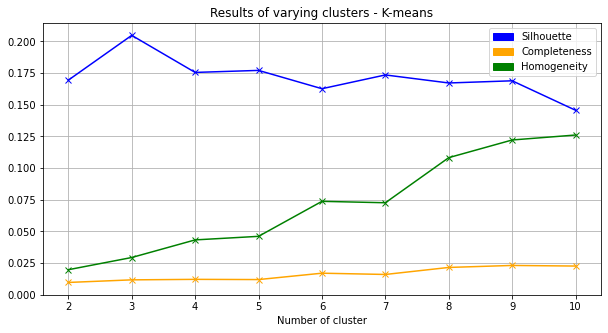

In [24]:
#Arrays for each of the metric to be added to 
silhouette=[]
Completeness=[]
Homogeneity=[]

#For each of the metrics add them to thier appropriate array
for i in range (len(cluster_array)):
    silhouette.append(cluster_array[i][0])
    Completeness.append(cluster_array[i][1])
    Homogeneity.append(cluster_array[i][2])

#Plot the results on a line chart
plt.figure(figsize=(10,5))
plt.plot(silhouette, color='blue', marker='x')
plt.plot(Completeness, color='orange', marker='x')
plt.plot(Homogeneity, color='green',marker='x')
plt.title("Results of varying clusters - K-means")
plt.xlabel("Number of cluster")
plt.xticks(np.arange(len(k_range2)), k_range2)
silhouette_patch = mpatches.Patch(color='blue',label='Silhouette')
completeness_patch = mpatches.Patch(color='orange',label='Completeness')
homogeneity_patch = mpatches.Patch(color='green',label='Homogeneity')
plt.legend(handles=[silhouette_patch,completeness_patch,homogeneity_patch])
plt.grid(True)
plt.show()


Optimal number of cluster is <b>9</b>.

# Supervised Model 

## Splitting Data

In [25]:
# Segment the data into Temporary and Test Data 
X_tmp, X_test, Y_tmp, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

# Segment Temporary data into Training and Validation:
X_train, X_valid, Y_train, Y_valid = train_test_split(X_tmp, Y_tmp, test_size=0.3, random_state=1) 

print ("\nSize of Temporary Data (70%) which is furthur split into data for training and validation:{0}".format(X_tmp.shape[0]))
print ("Size of Training Data (70%): {0}".format(X_train.shape[0]))
print ("Size of Validation Data (30%): {0}".format(X_valid.shape[0]))
print ("Size of Testing Data (30%): {0}".format(X_test.shape[0]))


Size of Temporary Data (70%) which is furthur split into data for training and validation:19018
Size of Training Data (70%): 13312
Size of Validation Data (30%): 5706
Size of Testing Data (30%): 8151


## Choosing a Supervised Method

In [26]:
#Checking the accuract score of each of the model 
#and choosing the one with the highest 
print ("\n\n#########################Logistic Regression##############################")
#Model for logstic Regression
lm = LogisticRegression(solver='lbfgs', max_iter=1000)
lm.fit(X_train, Y_train)
lm.predict_proba(X_valid)
lm_predicted = lm.predict(X_valid)
print("Calssification Report:\n{0}".format(metrics.classification_report(Y_valid, lm_predicted)))
print("Confustion Matrix:\n{0}\n".format(metrics.confusion_matrix(Y_valid, lm_predicted)))
print("Accuracy Score: {0:.2f}%".format(metrics.accuracy_score(Y_valid, lm_predicted)*100))

print ("\n\n#########################Decision Tree####################################")
#Model for Decision Trees
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
dt_predicted = dt.predict(X_valid)
print("Calssification Report:\n{0}".format(metrics.classification_report(Y_valid, dt_predicted)))
print("Confustion Matrix:\n{0}\n".format(metrics.confusion_matrix(Y_valid, dt_predicted)))
print("Accuracy Score: {0:.2f}%".format(metrics.accuracy_score(Y_valid, dt_predicted)*100))

print ("\n\n#########################Naive Bayes#######################################")
#Model for Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
gnb_predicted = gnb.predict(X_valid)
print("Calssification Report:\n{0}".format(metrics.classification_report(Y_valid, gnb_predicted)))
print("Confustion Matrix:\n{0}\n".format(metrics.confusion_matrix(Y_valid, gnb_predicted)))
print("Accuracy Score: {0:.2f}%".format(metrics.accuracy_score(Y_valid, gnb_predicted)*100))

print ("\n\n#########################K Neareast Neighbors#############################")
#Model for K Neareast Neighbors
kn = KNeighborsClassifier()
kn.fit(X_train, Y_train)
kn_predicted = kn.predict(X_valid)
print("Calssification Report:\n{0}".format(metrics.classification_report(Y_valid, kn_predicted)))
print("Confustion Matrix:\n{0}\n".format(metrics.confusion_matrix(Y_valid, kn_predicted)))
print("Accuracy Score: {0:.2f}%".format(metrics.accuracy_score(Y_valid, kn_predicted)*100))



#########################Logistic Regression##############################
Calssification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5122
           1       0.74      0.14      0.24       584

    accuracy                           0.91      5706
   macro avg       0.83      0.57      0.59      5706
weighted avg       0.89      0.91      0.88      5706

Confustion Matrix:
[[5093   29]
 [ 501   83]]

Accuracy Score: 90.71%


#########################Decision Tree####################################
Calssification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      5122
           1       0.40      0.43      0.41       584

    accuracy                           0.88      5706
   macro avg       0.67      0.68      0.67      5706
weighted avg       0.88      0.88      0.88      5706

Confustion Matrix:
[[4749  373]
 [ 335  249]]

Accuracy Score: 87.59%


####

K Nearest Model has the highest acurray score of <b>91.48%</b>, hence this model will be classification will be choosen as the supervised predictin model.

## Model Building - K Nearest Neighbors

### Untuned Model 

In [27]:
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
predicted = model.predict(X_valid)
print("Calssification Report:\n{0}".format(metrics.classification_report(Y_valid, predicted)))
print("Confustion Matrix:\n{0}\n".format(metrics.confusion_matrix(Y_valid, predicted)))
print("Accuracy Score: {0:.2f}%".format(metrics.accuracy_score(Y_valid, predicted)*100))

Calssification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      5122
           1       0.64      0.39      0.48       584

    accuracy                           0.91      5706
   macro avg       0.79      0.68      0.72      5706
weighted avg       0.90      0.91      0.91      5706

Confustion Matrix:
[[4995  127]
 [ 359  225]]

Accuracy Score: 91.48%


#### Testing with Untuned Model 

In [28]:
predicted2 = model.predict(X_test)
print("Calssification Report:\n{0}".format(metrics.classification_report(Y_test, predicted2)))
print("Confustion Matrix:\n{0}\n".format(metrics.confusion_matrix(Y_test, predicted2)))
print("Accuracy Score: {0:.2f}%".format(metrics.accuracy_score(Y_test, predicted2)*100))

Calssification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7316
           1       0.63      0.40      0.49       835

    accuracy                           0.91      8151
   macro avg       0.78      0.68      0.72      8151
weighted avg       0.90      0.91      0.91      8151

Confustion Matrix:
[[7122  194]
 [ 504  331]]

Accuracy Score: 91.44%


### Tuned Model 

In [29]:
model2 = KNeighborsClassifier(n_neighbors=10, p=1)
model2.fit(X_train, Y_train)
model2.predict_proba(X_valid)
predicted3 = model2.predict(X_valid)
print("Calssification Report:\n{0}".format(metrics.classification_report(Y_valid, predicted3)))
print("Confustion Matrix:\n{0}\n".format(metrics.confusion_matrix(Y_valid, predicted3)))
print("Accuracy Score: {0:.2f}%".format(metrics.accuracy_score(Y_valid, predicted3)*100))

Calssification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      5122
           1       0.70      0.32      0.44       584

    accuracy                           0.92      5706
   macro avg       0.81      0.65      0.70      5706
weighted avg       0.90      0.92      0.90      5706

Confustion Matrix:
[[5042   80]
 [ 398  186]]

Accuracy Score: 91.62%


#### Testing with tuned model 

In [30]:
predicted4 = model2.predict(X_test)
print("Calssification Report:\n{0}".format(metrics.classification_report(Y_test, predicted4)))
print("Confustion Matrix:\n{0}\n".format(metrics.confusion_matrix(Y_test, predicted4)))
print("Accuracy Score: {0:.2f}%".format(metrics.accuracy_score(Y_test, predicted4)*100))

Calssification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7316
           1       0.72      0.33      0.45       835

    accuracy                           0.92      8151
   macro avg       0.83      0.66      0.70      8151
weighted avg       0.91      0.92      0.90      8151

Confustion Matrix:
[[7211  105]
 [ 559  276]]

Accuracy Score: 91.85%
